In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Градиентный спуск

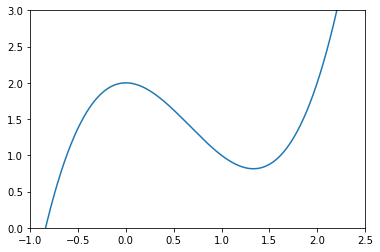

In [2]:
f = lambda x: x**3-2*x**2+2
x = np.linspace(-1,2.5,1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

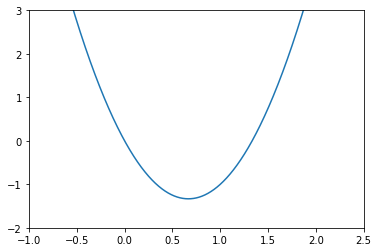

In [3]:
f_prime = lambda x: 3*x**2-4*x
x = np.linspace(-1,2.5,1000)
plt.plot(x,f_prime(x))
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Метод градиентного спуска

In [4]:
lr = 0.1
points = [2]
n_epochs = 15

In [5]:
for _ in range(n_epochs):
    cur_point = points[-1]
    grad = f_prime(cur_point)
    new_point = cur_point - lr * grad
    points.append(new_point)

In [6]:
y_points = [f(p) for p in points]


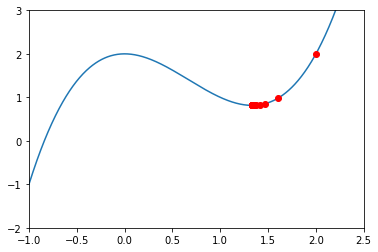

In [7]:
plt.plot(x,f(x))
plt.plot(points, y_points, 'ro')
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Практический пример

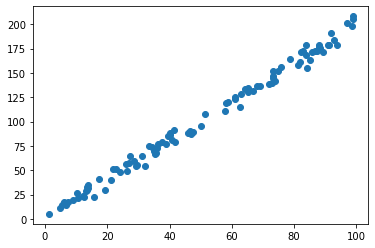

In [8]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

<img src="gradientdescentofmsetable.png"/>

## Применим метод градиентного спуска

In [9]:
EPOCHS = 20
LEARNING_RATE = 0.0001

In [10]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) ** 2
    return total_cost / (2 * len(X))

In [11]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
    return total_cost / (len(X))    

In [12]:
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost / (len(X))  

In [13]:
theta0 = 1
theta1 = 1
for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 = theta0 - LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 1.0050198320366885 t1: 1.3367336226698465 cost: 743.6179462281101
t0: 1.00834418615774 t1: 1.5592945164651997 cost: 332.1663449424837
t0: 1.01054792957864 t1: 1.7063939951651603 cost: 152.42669590073115
t0: 1.0120110154983877 t1: 1.803617945582322 cost: 73.90873212904097
t0: 1.0129845704894198 t1: 1.86787712429091 cost: 39.608727205419974
t0: 1.0136345743501696 t1: 1.9103485403196654 cost: 24.625016803856806
t0: 1.0140707299018918 t1: 1.9384195349906772 cost: 18.079489524846593
t0: 1.0143655442153579 t1: 1.9569727036090676 cost: 15.220121324099676
t0: 1.0145669401721467 t1: 1.9692351526363077 cost: 13.971024973752474
t0: 1.0147065919600937 t1: 1.977339808408262 cost: 13.425364198852948
t0: 1.0148054343423436 t1: 1.9826964089700008 cost: 13.18699415177588
t0: 1.0148773039580632 t1: 1.986236707716988 cost: 13.082861829862932
t0: 1.014931346006658 t1: 1.988576538486578 cost: 13.037370284400499
t0: 1.01497360492357 t1: 1.990122930989718 cost: 13.017495536798105
t0: 1.0150080757228181 t

In [14]:
cost_function(X,Y,10,10)

112334.08469727702

In [15]:
# h(xi) = params[0] + params[1] * xi

EPOCHS = 12
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions)    

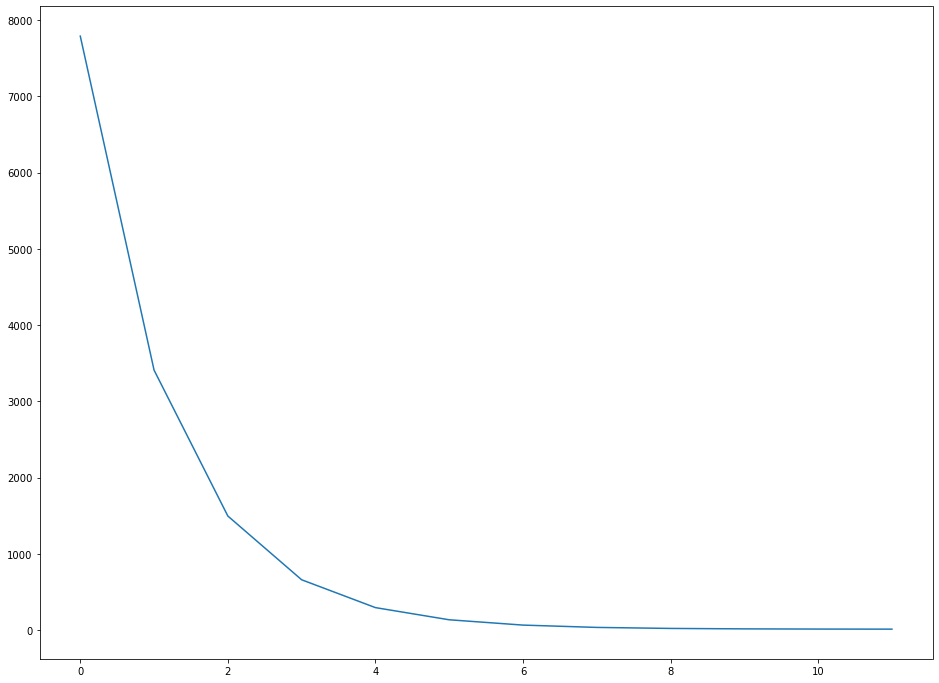

In [16]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

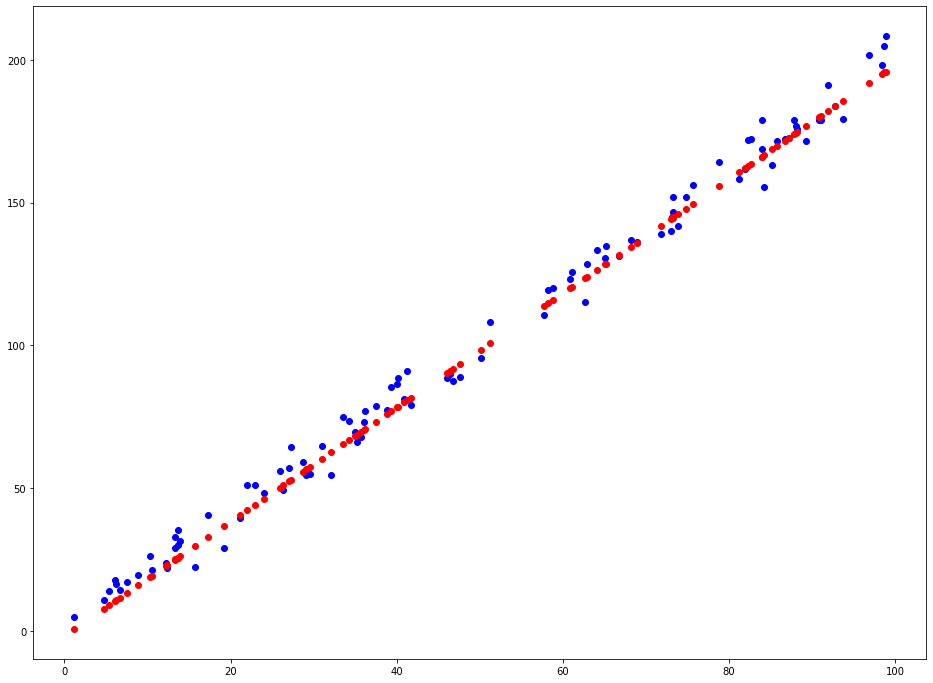

In [17]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()

In [18]:
params

array([-1.58177807,  2.01681725])

## Метод стохастического градиентного спуска

In [19]:
EPOCHS = 120
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    # Для статистики считаем общее предсказание и функцию потерь
    predictions = params[0] + params[1] * X
    preds.append(predictions)
    
    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    i = np.random.choice(len(X))
    current_prediction = params[0] + params[1] * X[i]

    params[0] -= LEARNING_RATE * (current_prediction - Y[i])
    params[1] -= LEARNING_RATE * ((current_prediction - Y[i]) * X[i])

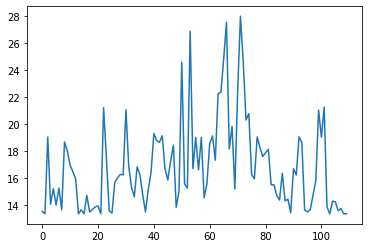

In [20]:
plt.plot(costs[10:])
plt.show()

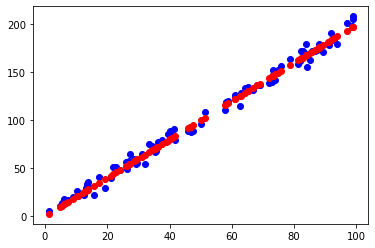

In [21]:
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()

## Broyden-Fletcher-Goldfarb-Shanno algorithm (BFGS)

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [23]:
def square(X):
    return X[0]**2 + X[1]**2

phi_m = np.linspace(-2, 2, 100)
phi_p = np.linspace(-2, 2, 100)
X,Y = np.meshgrid(phi_p, phi_m)
XY = np.hstack((X.reshape(-1, 1), Y.reshape(-1,1)))
Z = np.array([square(t) for t in XY]).reshape(X.shape)

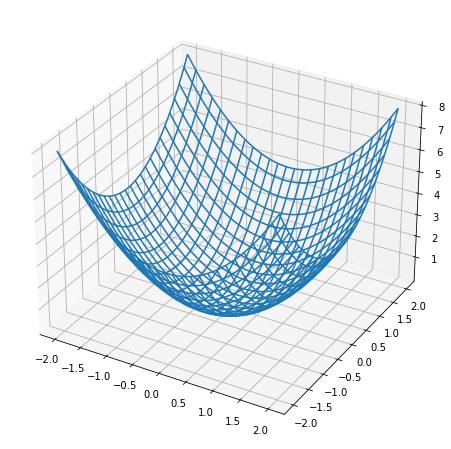

In [24]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
# Add a color bar which maps values to colors.

plt.show()

In [25]:
from scipy.optimize import minimize

In [26]:
res = minimize(square, np.array((1,1)), method='BFGS')

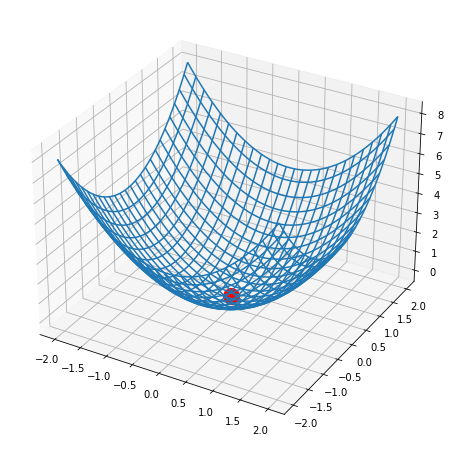

In [27]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
ax.scatter(res.x[0].reshape(-1, 1), res.x[1].reshape(-1, 1), np.array([square(res.x)]).reshape(-1,1),
          c='red', s=256)

plt.show()

### Домашнее задание

* Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
* Реализовать самостоятельно логистическую регрессию
* Обучить ее методом градиентного спуска
* Методом nesterov momentum
* Методом rmsprop

In [28]:
import pandas as pd
import numpy as np
import math
from sklearn.datasets import load_iris

In [29]:
X,y = load_iris(return_X_y=True)
filter = y != 2              # накладываем фильтр - только 2 признака
X = X[filter]
y = y[filter]

COEFS = np.random.randn(5)   # генерируем случайные коэффициенты

In [30]:
def predict_proba(coefs, x):
    # формула логистической регрессии:
    asarray_c = np.squeeze(np.asarray(coefs[:4]))
    asarray_x = np.squeeze(np.asarray(x))
    return 1. / (1. + np.exp( -(asarray_x.dot(asarray_c) + coefs[-1])))

In [31]:
# теперь на основе модели предсказываем класс (но модель пока не обучена: 
# это сделаем градиентным спуском чуть позже)
def predict_class(coefs, x):
    probas = predict_proba(coefs, x)
    return (probas > 0.5).astype(np.float)

In [32]:
# явно прописываем функцию потерь на основе ее формулы
def bce_loss(coefs, x, y):
    probas = predict_proba(coefs, x)
    filter_ones = y == 1
    loss = -1. * (np.sum(np.log(probas[filter_ones])) + np.sum(np.log(1. - probas[~filter_ones]))) / len(y)
    return loss

In [33]:
# расчет градиента:
# он зависит от двух сущностей: от модели и функции потерь
def grad(coefs, x, y, sgd=0):
    probas = predict_proba(coefs, x)
    delta = probas - y
    modified_x = x.T * delta
    deltas = np.mean(modified_x, axis=1)
    if sgd == 1:
        return deltas, np.mean(delta)
    return *deltas, np.mean(delta)

In [34]:
# обучение модели методом градиентного спуска
def learn_sgd(coefs, x, y, num_epochs=32, learning_rate=0.1):
    losses = []
    new_coefs = coefs
    for e in range(num_epochs):
        grad_coefs, grad_bias = grad(coefs, x, y, 1)
        new_coefs[:-1] = new_coefs[:-1] - learning_rate * grad_coefs
        new_coefs[-1] = new_coefs[-1] - learning_rate * grad_bias
        loss = bce_loss(new_coefs, x, y)
        losses.append(loss)
    return losses, new_coefs

In [35]:
loss_1, coefs_1 = learn_sgd(COEFS, X, y)

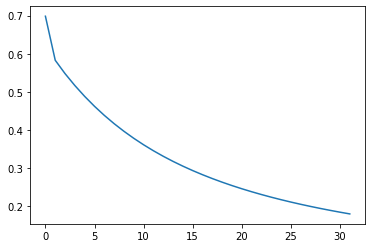

In [36]:
plt.plot(loss_1)
plt.show()

In [37]:
def learn_nesterov(coefs, x, y, num_epochs=32, momentum=0.9, learning_rate=0.1):
    v_t = [0 for _ in range(len(coefs))]
    losses = []
    new_coefs = coefs
    for it in range(num_epochs):
        pr_coefs  = [coefs[i] - momentum*v_t[i] for i in range(len(coefs))]
        gr_coefs = grad(pr_coefs, x, y)
        for i in range(len(coefs)):
            v_t[i] = momentum*v_t[i] + learning_rate*gr_coefs[i]
            new_coefs[i] = coefs[i] - v_t[i]
        losses.append(bce_loss(new_coefs, x, y))
    return losses, new_coefs

In [38]:
loss_2, coefs_2 = learn_nesterov(COEFS, X, y)

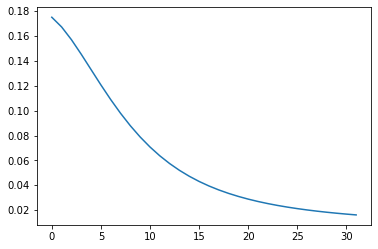

In [39]:
plt.plot(loss_2)
plt.show()

In [40]:
def learn_RMSprop(coefs, x, y, num_epochs=32, momentum=0.9, learning_rate=0.1):
    e = 10**(-8)
    S = [0 for _ in range(len(coefs))]
    losses =[]
    new_coefs = coefs
    for it in range(num_epochs):
        gr_coefs = grad(new_coefs, x, y)
        gr_coefs_2 = [x**2 for x in gr_coefs]
        for i in range(len(coefs)):
            S[i]=momentum*S[i] + (1-momentum)*gr_coefs_2[i]
            new_coefs[i] = new_coefs[i]-learning_rate* (gr_coefs[i]/(math.sqrt(S[i])+e))  
        losses.append(bce_loss(new_coefs, x, y))
    return losses, new_coefs

In [41]:
loss_3, coefs_3 = learn_RMSprop(COEFS, X, y)

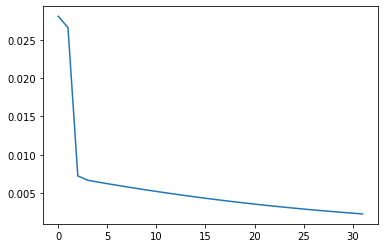

In [42]:
plt.plot(loss_3)
plt.show()